<a href="https://colab.research.google.com/github/vanhp/Bearcheck/blob/master/whichbear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pip install fastai2

     |████████████████████████████████| 184kB 3.5MB/s 


In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 358kB 4.8MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 1.0MB 15.8MB/s 
     |████████████████████████████████| 40kB 4.6MB/s 
     |████████████████████████████████| 92kB 8.3MB/s 
     |████████████████████████████████| 61kB 5.5MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
     |████████████████████████████████| 2.7MB 20.8MB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *

In [ ]:
from fastai.vision.all import *
#path = untar_data(URLs.PETS,dest='gdrive/My Drive/data')/'images'
#path

Path('gdrive/My Drive/data/oxford-iiit-pet/images')

In [ ]:
# bing search key
key ='a62d8129d1eb44ad98e6b9c25632ec7b'

In [ ]:
search_images_bing

<function fastbook.search_images_bing>

In [ ]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('content_url')
len(ims)

150

In [ ]:
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [ ]:
dest = 'gdrive/My Drive/data/bears/images/grizzly.jpg'
download_url(ims[0], dest)

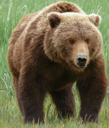

In [ ]:
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
bear_types = 'grizzly','black','teddy'
path = Path('gdrive/My Drive/data/bears/images/bears')
path

Path('gdrive/My Drive/data/bears/images/bears')

In [ ]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('content_url'))

In [ ]:
fns = get_image_files(path)
fns

(#436) [Path('gdrive/My Drive/data/bears/images/bears/grizzly/00000000.jpg'),Path('gdrive/My Drive/data/bears/images/bears/grizzly/00000006.jpg'),Path('gdrive/My Drive/data/bears/images/bears/grizzly/00000009.jpg'),Path('gdrive/My Drive/data/bears/images/bears/grizzly/00000004.jpg'),Path('gdrive/My Drive/data/bears/images/bears/grizzly/00000002.jpg'),Path('gdrive/My Drive/data/bears/images/bears/grizzly/00000001.jpg'),Path('gdrive/My Drive/data/bears/images/bears/grizzly/00000010.png'),Path('gdrive/My Drive/data/bears/images/bears/grizzly/00000005.jpg'),Path('gdrive/My Drive/data/bears/images/bears/grizzly/00000011.jpg'),Path('gdrive/My Drive/data/bears/images/bears/grizzly/00000003.jpg')...]

In [ ]:
# find non bear images
failed = verify_images(fns)
failed

(#15) [Path('gdrive/My Drive/data/bears/images/bears/grizzly/00000030.jpg'),Path('gdrive/My Drive/data/bears/images/bears/grizzly/00000054.jpg'),Path('gdrive/My Drive/data/bears/images/bears/grizzly/00000055.jpg'),Path('gdrive/My Drive/data/bears/images/bears/grizzly/00000097.jpg'),Path('gdrive/My Drive/data/bears/images/bears/grizzly/00000134.jpg'),Path('gdrive/My Drive/data/bears/images/bears/grizzly/00000141.jpg'),Path('gdrive/My Drive/data/bears/images/bears/black/00000033.jpg'),Path('gdrive/My Drive/data/bears/images/bears/black/00000079.jpg'),Path('gdrive/My Drive/data/bears/images/bears/teddy/00000030.jpg'),Path('gdrive/My Drive/data/bears/images/bears/teddy/00000056.jpg')...]

In [ ]:
# remove non bear images
# failed.map(Path.unlink);

In [ ]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = bears.dataloaders(path)

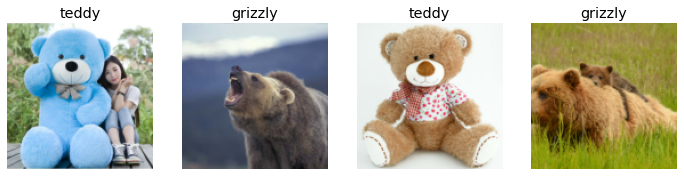

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

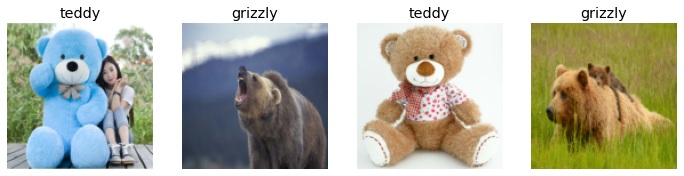

In [ ]:
# show augment by squish
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

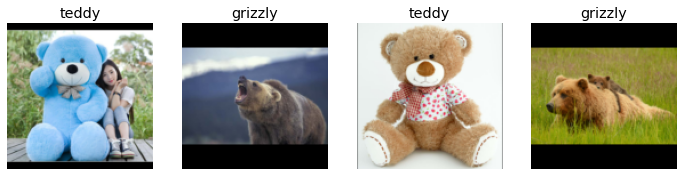

In [ ]:
# show augment by resize
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

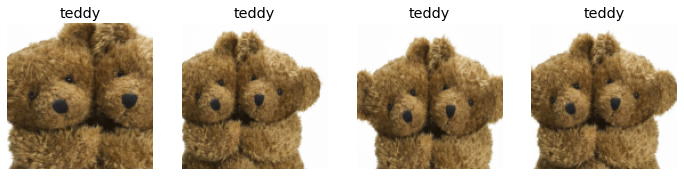

In [ ]:
# show augment by random resize then crop
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

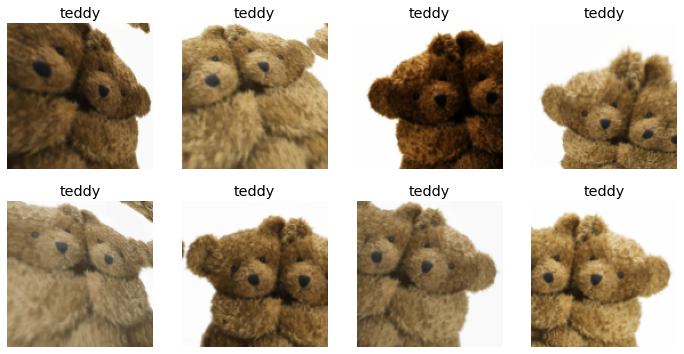

In [ ]:
# show augment by resize
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [ ]:
# train the pretrained model
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.319786,0.169915,0.035714,00:21


epoch,train_loss,valid_loss,error_rate,time
0,0.186982,0.094014,0.023810,00:20
1,0.127319,0.106903,0.023810,00:20
2,0.090649,0.104100,0.023810,00:20
3,0.069237,0.088316,0.011905,00:20


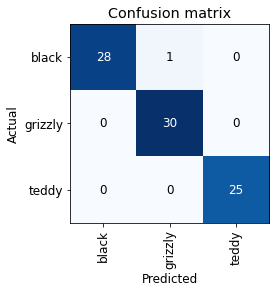

In [ ]:
# check how good it does?
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


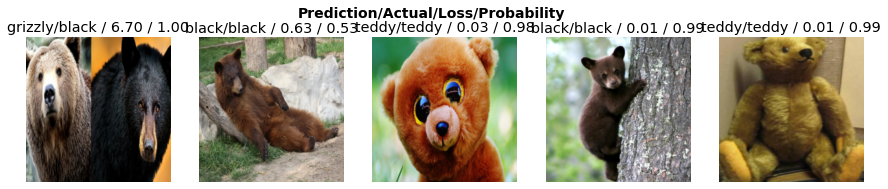

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
leaner = ImageClassifierCleaner(learn)
cleaner

NameError: ignored

## Deploy the model for production

In [ ]:
# create model for deployment
learn.export('gdrive/My Drive/bear-model.pkl')

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
# for use in production setting
# load the model into memory

# learn_inf = load_learner(path/'export.pkl')

In [ ]:
# predict user images
# learn_inf.predict('images/grizzly.jpg')

In [ ]:
# verify performance
# learn_inf.dls.vocab